In [7]:
import warnings
warnings.filterwarnings("ignore")


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


In [2]:
import pandas as pd

data = pd.read_csv("Mall_Customers.csv")
print(data.head())


   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [3]:
from sklearn.preprocessing import StandardScaler

# Drop CustomerID and Gender for clustering
X = data.drop(['CustomerID', 'Gender'], axis=1)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


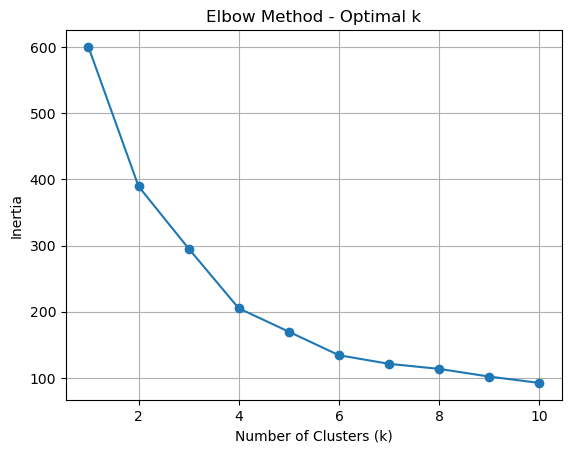

In [9]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot elbow curve
plt.plot(k_range, inertia, marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method - Optimal k")
plt.grid(True)
plt.show()


In [8]:
# Apply KMeans with chosen number of clusters (say k=5)
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Add cluster labels to the original data
data['Cluster'] = clusters
print(data.head())


   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1    Male   19                  15                      39   
1           2    Male   21                  15                      81   
2           3  Female   20                  16                       6   
3           4  Female   23                  16                      77   
4           5  Female   31                  17                      40   

   Cluster  
0        2  
1        2  
2        3  
3        2  
4        2  


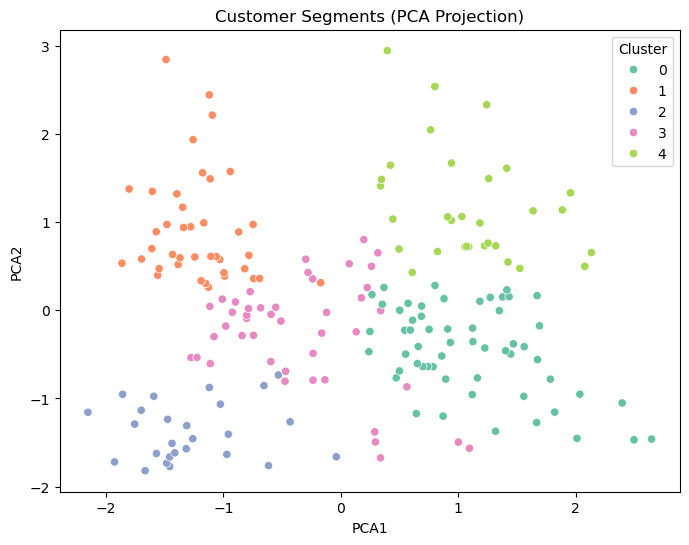

In [6]:
from sklearn.decomposition import PCA
import seaborn as sns

# Reduce to 2 dimensions
pca = PCA(n_components=2)
pca_components = pca.fit_transform(X_scaled)

# Create a DataFrame for visualization
pca_df = pd.DataFrame(data=pca_components, columns=['PCA1', 'PCA2'])
pca_df['Cluster'] = clusters

# Plot clusters
plt.figure(figsize=(8,6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=pca_df, palette='Set2')
plt.title("Customer Segments (PCA Projection)")
plt.legend(title='Cluster')
plt.show()


### 📝 Insights from Customer Segmentation

- Cluster 0: Young customers with high spending scores.
- Cluster 1: High income but low spending customers.
- Cluster 2: Moderate income and balanced spending.
- Cluster 3: Low income but high spending.
- Cluster 4: Older customers with moderate income and low spending.

Clustering helps businesses target marketing strategies to different customer types.
